<a href="https://colab.research.google.com/github/kamjelonek/Project_2_CLASS/blob/main/driver_EEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from pandas.plotting import scatter_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import ADASYN
from sklearn.manifold import TSNE
from imblearn.over_sampling import KMeansSMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from mlxtend import plotting
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import ExtraTreesClassifier

In [24]:
def Plot_3D(X,y,a,b,c):

  X_show = np.array(X)
  y_show = np.array(y)

  fig = plt.figure(figsize=(10, 8))

  ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)
  ax = plt.axes(projection='3d')
  ax.scatter3D(X_show[:, a], X_show[:, b], X_show[:, c],c=y_show, edgecolor="k")
  return plt.show()

def Feature_2D(X,y):

  model_tsne = TSNE(n_components=2)

  X_show = np.array(X)
  y_show = np.array(y)

  X_tse=model_tsne.fit_transform(X_show)

  x1=X_tse[:,0]
  x2=X_tse[:,1]

  plt.figure(figsize=(8,8))
  plt.scatter(x1,x2,c=y_show)
  plt.show()

In [25]:
df = pd.read_csv('acquiredDataset.csv')
df.head()

# Attenction - Proprietary measure of mental focus from 0-100
# meditation - Proprietary measure of calmness from 0-100
# delta - 1-3 Hz of power spectrum
# theta - 4-7 Hz of power spectrum
# lowAlpha - Lower 8-11 Hz of power spectrum
# highAlpha - Higher 8-11 Hz of power spectrum
# lowBeta - Lower 12-29 Hz of power spectrum
# highBeta - Higher 12-29 Hz of power spectrum
# lowGamma - Lower 30-100 Hz of power spectrum
# highGamma - Higher 30-100 Hz of power spectrum
# classification - (0-sleepy/1-awake?)

attention  meditation   delta   theta  lowAlpha  highAlpha  lowBeta  \
0         26          34  960462  277180     26575      27356    26575   
1         29          54   39145   28225     20172      39551    20172   
2         40          48   75410   43144      8601      13564     8601   
3         66          47   16057   41211      2534      34254     2534   
4         81          67   10304   47239     33158      47349    33158   

   highBeta  lowGamma  highGamma  classification  
0     13056      9126       2683               0  
1      9933      5237       4750               0  
2     11663      2515       3251               0  
3     27663     11396       2825               0  
4     16328      5298       5471               0

In [26]:
df.shape

(3735, 11)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   attention       3735 non-null   int64
 1   meditation      3735 non-null   int64
 2   delta           3735 non-null   int64
 3   theta           3735 non-null   int64
 4   lowAlpha        3735 non-null   int64
 5   highAlpha       3735 non-null   int64
 6   lowBeta         3735 non-null   int64
 7   highBeta        3735 non-null   int64
 8   lowGamma        3735 non-null   int64
 9   highGamma       3735 non-null   int64
 10  classification  3735 non-null   int64
dtypes: int64(11)
memory usage: 321.1 KB


In [28]:
df['classification'].unique()

array([0, 1])

In [29]:
print('Duplicate rows:')
print(df.duplicated().sum())

Duplicate rows:
0


In [30]:
df.nunique()


attention           60
meditation          60
delta             3724
theta             3680
lowAlpha          3601
highAlpha         3561
lowBeta           3573
highBeta          3494
lowGamma          3259
highGamma         3651
classification       2
dtype: int64

In [31]:
nany = df.isna().sum()
print("Liczba brakujących wartości:")
print(nany)

Liczba brakujących wartości:
attention         0
meditation        0
delta             0
theta             0
lowAlpha          0
highAlpha         0
lowBeta           0
highBeta          0
lowGamma          0
highGamma         0
classification    0
dtype: int64


In [32]:
df.corr()

attention  meditation     delta     theta  lowAlpha  \
attention        1.000000    0.012465 -0.142241 -0.053082 -0.051414   
meditation       0.012465    1.000000 -0.075071 -0.081029  0.159976   
delta           -0.142241   -0.075071  1.000000  0.380921  0.363079   
theta           -0.053082   -0.081029  0.380921  1.000000  0.456296   
lowAlpha        -0.051414    0.159976  0.363079  0.456296  1.000000   
highAlpha        0.047367    0.015013  0.257987  0.656068  0.256059   
lowBeta          0.006725    0.009094  0.349557  0.344237  0.693183   
highBeta         0.166178    0.027394  0.225820  0.663608  0.437718   
lowGamma         0.059002   -0.097699  0.253741  0.285673  0.294094   
highGamma        0.032169    0.166853  0.287873  0.594448  0.444335   
classification   0.049283   -0.057642 -0.229921 -0.205588 -0.174786   

                highAlpha   lowBeta  highBeta  lowGamma  highGamma  \
attention        0.047367  0.006725  0.166178  0.059002   0.032169   
meditation       0.015013  0.009094  0.027394 -0.097699   0.166853   
delta            0.257987  0.349557  0.225820  0.253741   0.287873   
theta            0.656068  0.344237  0.663608  0.285673   0.594448   
lowAlpha         0.256059  0.693183  0.437718  0.294094   0.444335   
highAlpha        1.000000  0.271657  0.632582  0.281427   0.469033   
lowBeta          0.271657  1.000000  0.199992  0.403545   0.182727   
highBeta         0.632582  0.199992  1.000000  0.301577   0.650842   
lowGamma         0.281427  0.403545  0.301577  1.000000   0.027007   
highGamma        0.469033  0.182727  0.650842  0.027007   1.000000   
classification  -0.190926 -0.063340 -0.213560 -0.049076  -0.103819   

                classification  
attention             0.049283  
meditation           -0.057642  
delta                -0.229921  
theta                -0.205588  
lowAlpha             -0.174786  
highAlpha            -0.190926  
lowBeta              -0.063340  
highBeta             -0.213560  
lowGamma             -0.049076  
highGamma            -0.103819  
classification        1.000000

In [33]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [34]:
#from pandas.profiling import ProfileReport

In [35]:
#profile = ProfileReport(df)
#profile

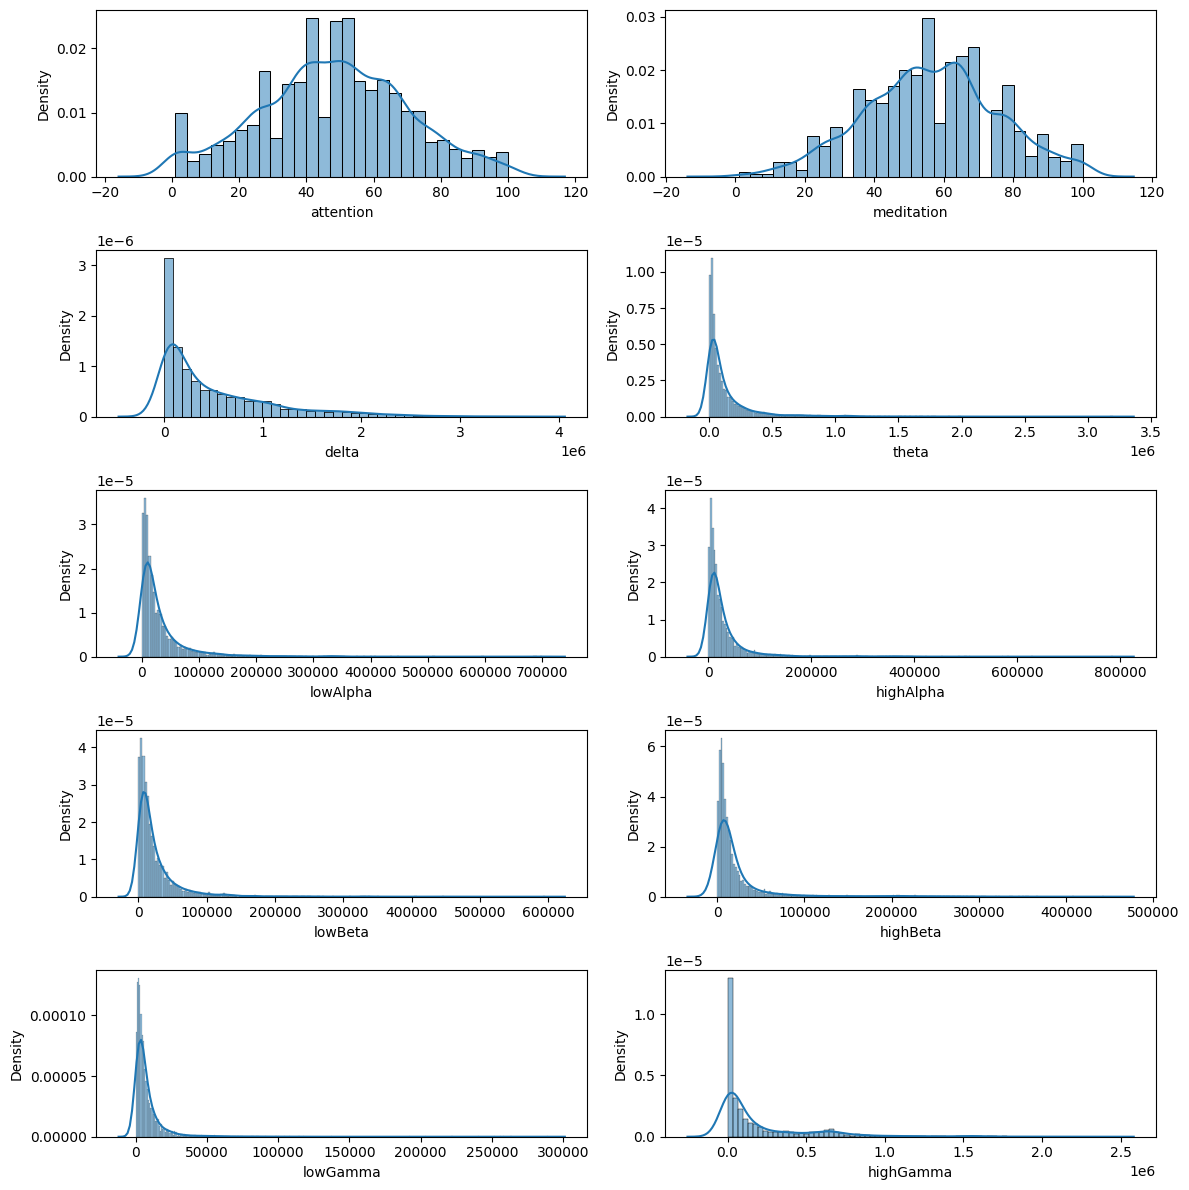

In [36]:
cols = list(df.columns)[0:len(df.columns)-1]
rows_plot = 5
cols_plot = 2
counter = 1
plt.rcParams["figure.figsize"] = [12, 12]
for col in cols:
    plt.subplot(rows_plot, cols_plot, counter)
    sns.histplot(df[col], kde=True, stat="density", kde_kws=dict(cut=4))
    counter += 1
plt.tight_layout()
plt.show()

In [37]:
scatter_matrix(df.drop(columns = ["classification"]), figsize=(10, 10))
plt.show()

In [38]:
_ = sns.pairplot(df, hue='classification', diag_kind='kde', markers=['o', 's'], height=1.5, aspect=1)

In [39]:
rows_plot=2
cols_plot=5
counter=1
plt.rcParams['figure.figsize']=[10,5]
for col in cols:
    plt.subplot(rows_plot,cols_plot,counter)
    sns.boxplot(x='classification',y=col,data=df)
    counter+=1

plt.tight_layout()
plt.show()

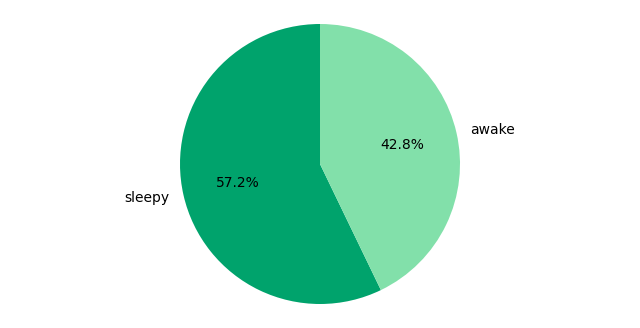

In [40]:
plt.figure(figsize=(8, 4))
plt.pie(df['classification'].value_counts(), labels=['sleepy', 'awake'], autopct='%1.1f%%', startangle=90, colors = ['#00A36C', '#82E0AA'])
plt.axis('equal')
plt.show()

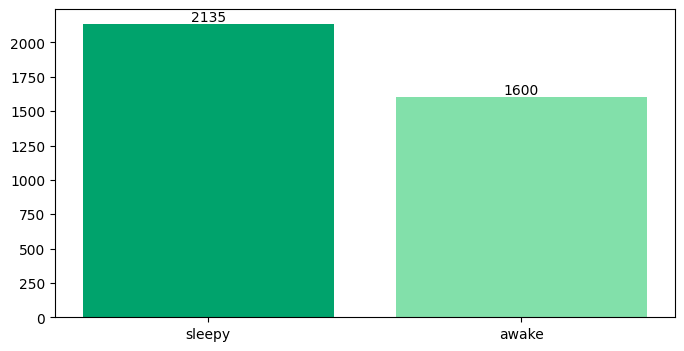

In [41]:
plt.figure(figsize=(8, 4))
ax = plt.gca()
bars = plt.bar(['sleepy', 'awake'], df['classification'].value_counts(), color=['#00A36C', '#82E0AA'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 0),
                textcoords="offset points", ha='center', va='bottom')

Text(0.5, 1.0, 'Sleepy/Awake vs Different Wave Frequency')

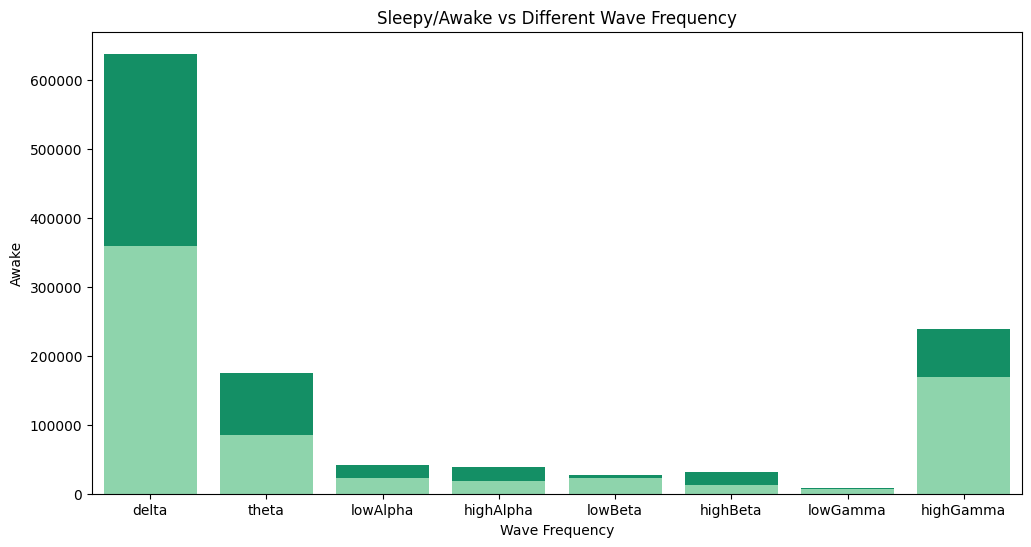

In [42]:
state_means = df.groupby('classification')[['delta', 'theta', 'lowAlpha', 'highAlpha','lowBeta', 'highBeta', 'lowGamma', 'highGamma']].mean()

state_means = state_means.T.reset_index()

state_means.columns = ['Wave Frequency', 'Sleepy', 'Awake']

state_band = ['delta', 'theta', 'lowAlpha', 'highAlpha','lowBeta', 'highBeta', 'lowGamma', 'highGamma']

state_means = state_means[state_means['Wave Frequency'].isin(state_band)]

plt.figure(figsize=(12, 6))
sns.barplot(x='Wave Frequency', y='Sleepy', data=state_means, color='#00A36C', label='Sleepy')
sns.barplot(x='Wave Frequency', y='Awake', data=state_means, color='#82E0AA', label='Awake')
plt.title('Sleepy/Awake vs Different Wave Frequency')


# Model selection

In [45]:
ada = ADASYN(sampling_strategy='minority', random_state=42)

X = df.drop(columns = ['classification'])
y = df['classification']

X_res_ada, y_res_ada = ada.fit_resample(X,y)

X_trainval, X_test, y_trainval, y_test = train_test_split(X_res_ada, y_res_ada, test_size=0.15, stratify=y_res_ada, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.15, stratify=y_trainval, random_state=42)

model_knn = KNeighborsClassifier()
model_svc = SVC(random_state=42)
model_tree = DecisionTreeClassifier(random_state=42)
model_rf = RandomForestClassifier(random_state=42)
model_logreg = LogisticRegression(random_state=42)
model_logregCV = LogisticRegressionCV(random_state=42)
model_brf = GradientBoostingClassifier(random_state=42)
model_gauss = GaussianNB()
model_mlp = MLPClassifier(random_state=42)

models = {0: model_knn,
          1: model_svc,
          2: model_tree,
          3: model_rf,
          4: model_brf,
          5: model_logreg,
          6: model_logregCV,
          7: model_gauss,
          8: model_mlp}

results = {"model": [],
           "accuracy": [],
           "precision": [],
           "recall": [],
           "f1-score (macro)": [],
           "mcc-score": []}

matrixs = []

for m in range(len(models)):
  models[m].fit(X_train,y_train)
  y_pred = models[m].predict(X_val)
  results["model"].append(models[m])
  results["accuracy"].append(accuracy_score(y_val,y_pred))
  results["precision"].append(precision_score(y_val,y_pred))
  results["recall"].append(recall_score(y_val,y_pred))
  results["f1-score (macro)"].append(f1_score(y_val,y_pred,average="macro"))
  results["mcc-score"].append(matthews_corrcoef(y_val,y_pred))
  matrixs.append(confusion_matrix(y_val,y_pred))

Plot_3D(X,y,0,1,2)
Plot_3D(X_res_ada,y_res_ada,0,1,2)
Feature_2D(X,y)
Feature_2D(X_res_ada,y_res_ada)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

X.shape: (4309, 10)
X_train.shape: (3112, 10)
X_test.shape: (647, 10)
X_val.shape: (550, 10)


model  accuracy  precision  \
0                             KNeighborsClassifier()  0.674545   0.653251   
1                               SVC(random_state=42)  0.616364   0.624535   
2            DecisionTreeClassifier(random_state=42)  0.736364   0.743590   
3  (DecisionTreeClassifier(max_features='sqrt', r...  0.807273   0.790541   
4  ([DecisionTreeRegressor(criterion='friedman_ms...  0.740000   0.722772   
5                LogisticRegression(random_state=42)  0.629091   0.660870   
6              LogisticRegressionCV(random_state=42)  0.663636   0.656566   
7                                       GaussianNB()  0.574545   0.547210   
8                     MLPClassifier(random_state=42)  0.610909   0.735294   

     recall  f1-score (macro)  mcc-score  
0  0.758993          0.671723   0.352620  
1  0.604317          0.616352   0.233035  
2  0.730216          0.736363   0.472847  
3  0.841727          0.806905   0.615546  
4  0.787770          0.739171   0.481420  
5  0.546763          0.626915   0.263535  
6  0.701439          0.662940   0.327469  
7  0.917266          0.514090   0.196710  
8  0.359712          0.585569   0.263481

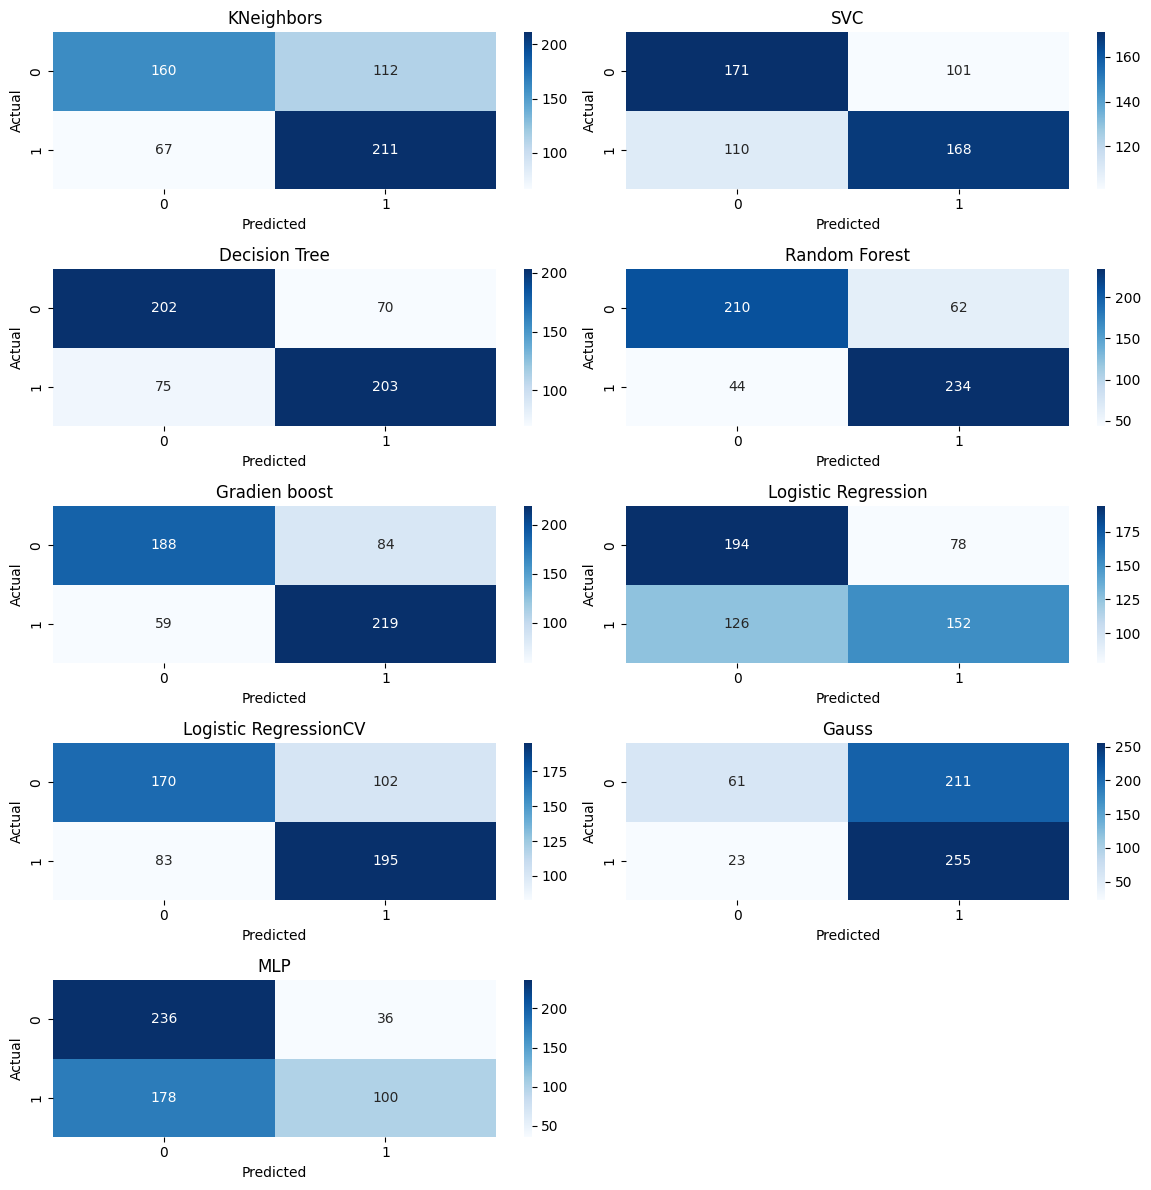

In [46]:
print(f"X.shape: {X_res_ada.shape}")
print(f'X_train.shape: {X_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'X_val.shape: {X_val.shape}')

df_results = pd.DataFrame(results)
display(df_results)

titles = {1: "KNeighbors",
          2: "SVC",
          3: "Decision Tree",
          4: "Random Forest",
          5: "Gradien boost",
          6: "Logistic Regression",
          7: "Logistic RegressionCV",
          8: "Gauss",
          9: "MLP"}

rows_plot = 5
cols_plot = 2
counter = 0
plt.rcParams["figure.figsize"] = [12, 12]
for matrix in matrixs:
    counter += 1
    plt.subplot(rows_plot, cols_plot, counter)
    sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
    plt.title(titles[counter])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
plt.show()

# KNN

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


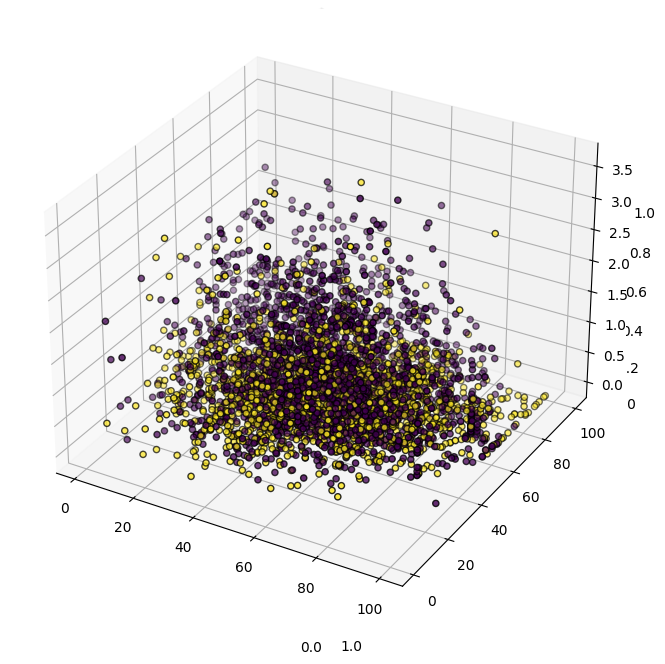

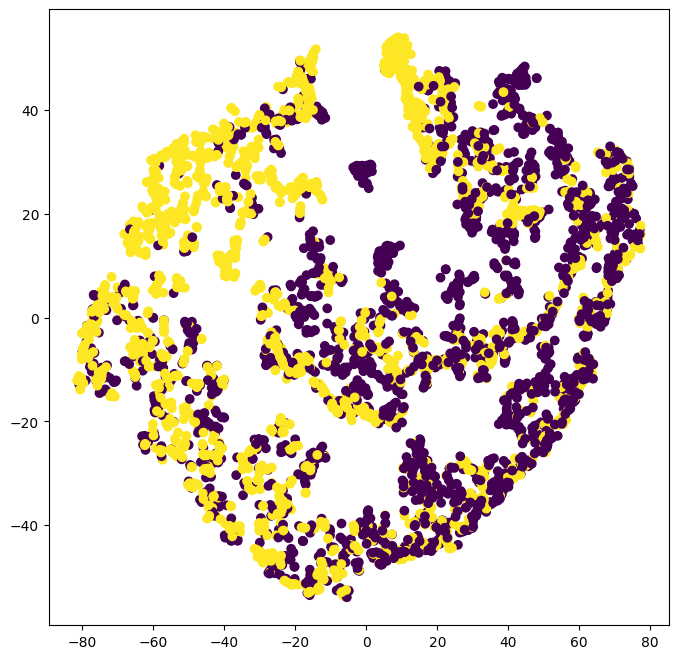

In [49]:
km = KMeansSMOTE(random_state=42)

params = {"n_neighbors": [3,5,7,9,11],
          "algorithm": ["ball_tree","kd_tree","brute"],
          "leaf_size": [15,30,45],
          "p": [1,2]}

gs_km = GridSearchCV(KNeighborsClassifier(),
                  param_grid=params,
                  cv=10,
                  scoring="f1_macro")

X_res_km, y_res_km = km.fit_resample(X,y)

X_trainval_km, X_test_km, y_trainval_km, y_test_km = train_test_split(X_res_km, y_res_km, test_size=0.15, stratify=y_res_km, random_state=42)
X_train_km, X_val_km, y_train_km, y_val_km = train_test_split(X_trainval_km, y_trainval_km, test_size=0.15, stratify=y_trainval_km, random_state=42)

gs_km.fit(X_train_km,y_train_km)

Plot_3D(X_res_km,y_res_km,0,1,2)

Feature_2D(X_res_km,y_res_km)

Accuracy score: 0.7761467889908257
Precision score: 0.8073770491803278
Recall score: 0.7242647058823529
matt_score: 0.5551471842852159
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       273
           1       0.81      0.72      0.76       272

    accuracy                           0.78       545
   macro avg       0.78      0.78      0.78       545
weighted avg       0.78      0.78      0.78       545



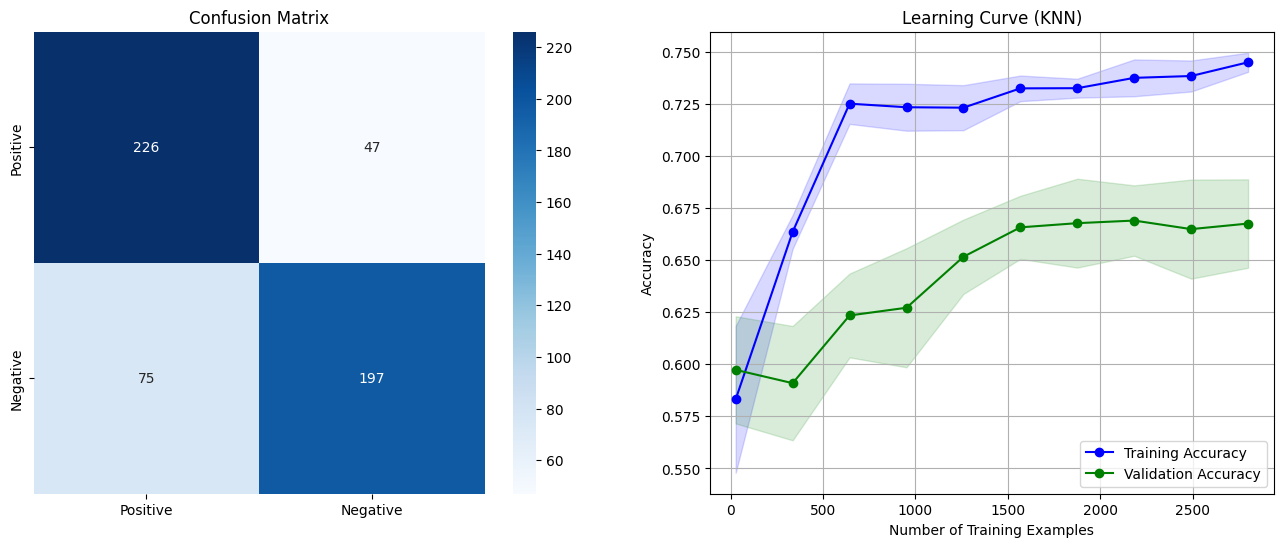

In [51]:
model_kn = KNeighborsClassifier(n_neighbors=gs_km.best_params_["n_neighbors"],
                                algorithm=gs_km.best_params_["algorithm"],
                                leaf_size=gs_km.best_params_["leaf_size"],
                                p=gs_km.best_params_["p"])

model_kn.fit(X_train_km, y_train_km)

y_pred_kn = model_kn.predict(X_val_km)

print(f"Accuracy score: {accuracy_score(y_val_km,y_pred_kn)}")
print(f"Precision score: {precision_score(y_val_km,y_pred_kn)}")
print(f"Recall score: {recall_score(y_val_km,y_pred_kn)}")
print(f"matt_score: {matthews_corrcoef(y_val_km,y_pred_kn)}")
matrix_kn = confusion_matrix(y_val_km,y_pred_kn)

print(classification_report(y_val_km,y_pred_kn))

train_sizes, train_scores, test_scores = learning_curve(model_kn,X_train, y_train,
                                                        cv=10, scoring='f1_macro',
                                                        train_sizes=np.linspace(0.01, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))

sns.heatmap(matrix_kn, annot=True, cmap='Blues', fmt='g', ax=ax1,
            xticklabels=["Positive","Negative"],
            yticklabels=["Positive","Negative"])
ax1.set_title("Confusion Matrix")

ax2.plot(train_sizes, train_mean, label='Training Accuracy', marker='o', color='blue')
ax2.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
ax2.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o', color='green')
ax2.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
ax2.set_title('Learning Curve (KNN)')
ax2.set_xlabel('Number of Training Examples')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='lower right')
ax2.grid(True)

plt.show()

# Random Forest

In [52]:
params_rf = {"n_estimators": [150,250],
          "criterion": ["gini","entropy"],
          "max_depth": [25,35],
          "min_samples_split": [5,15],
          "min_samples_leaf": [5,15]}

gs_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                  param_grid=params_rf,
                  cv=10,
                  scoring="f1_macro",
                  verbose=2)

gs_rf.fit(X_train,y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] END criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=150; total time=   1.3s
[CV] END criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=150; total time=   1.3s
[CV] END criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=150; total time=   1.7s
[CV] END criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=150; total time=   2.2s
[CV] END criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=150; total time=   1.3s
[CV] END criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=150; total time=   1.3s
[CV] END criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=150; total time=   1.3s
[CV] END criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=150; total time=   1.6s
[

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [25, 35], 'min_samples_leaf': [5, 15],
                         'min_samples_split': [5, 15],
                         'n_estimators': [150, 250]},
             scoring='f1_macro', verbose=2)

In [53]:
gs_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 35,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 250}

Accuracy score: 0.7
Precision score: 0.728744939271255
Recall score: 0.6474820143884892
matt_score: 0.40323019104248464
              precision    recall  f1-score   support

           0       0.68      0.75      0.71       272
           1       0.73      0.65      0.69       278

    accuracy                           0.70       550
   macro avg       0.70      0.70      0.70       550
weighted avg       0.70      0.70      0.70       550



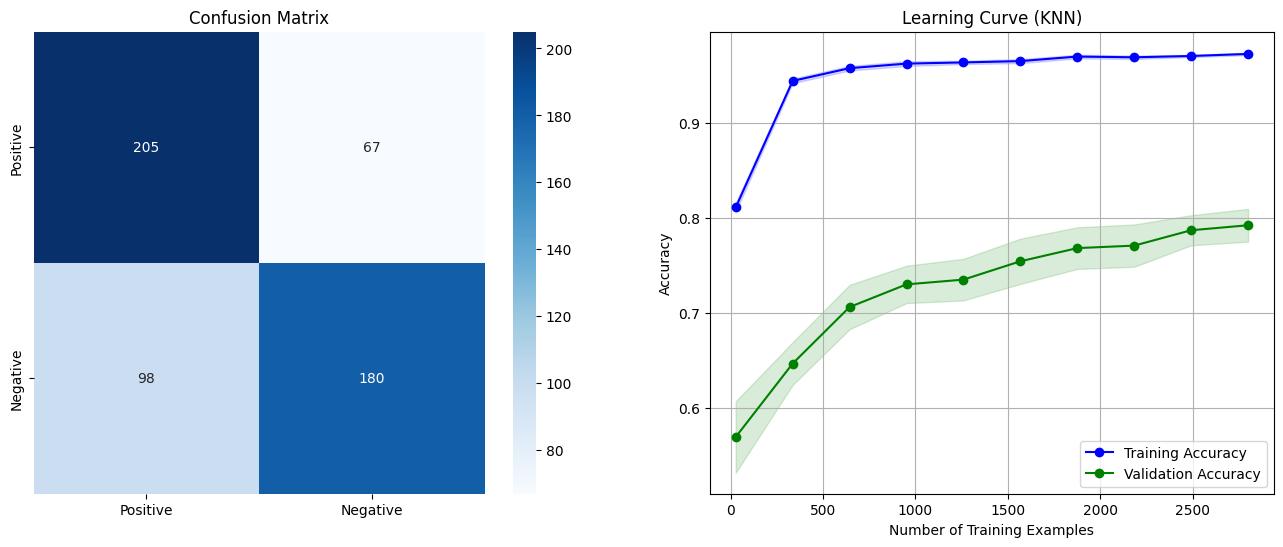

In [54]:
model_rf = RandomForestClassifier(criterion=gs_rf.best_params_['criterion'],
                                  max_depth=gs_rf.best_params_['max_depth'],
                                  min_samples_leaf=gs_rf.best_params_['min_samples_leaf'],
                                  min_samples_split=gs_rf.best_params_['min_samples_split'],
                                  n_estimators=gs_rf.best_params_['n_estimators'],
                                  random_state=42)

model_rf.fit(X_train, y_train)

y_pred_rf = model_kn.predict(X_val)

print(f"Accuracy score: {accuracy_score(y_val,y_pred_rf)}")
print(f"Precision score: {precision_score(y_val,y_pred_rf)}")
print(f"Recall score: {recall_score(y_val,y_pred_rf)}")
print(f"matt_score: {matthews_corrcoef(y_val,y_pred_rf)}")
matrix_rf = confusion_matrix(y_val,y_pred_rf)

print(classification_report(y_val,y_pred_rf))

train_sizes, train_scores, test_scores = learning_curve(model_rf,X_train, y_train,
                                                        cv=10, scoring='f1_macro',
                                                        train_sizes=np.linspace(0.01, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))

sns.heatmap(matrix_rf, annot=True, cmap='Blues', fmt='g', ax=ax1,
            xticklabels=["Positive","Negative"],
            yticklabels=["Positive","Negative"])
ax1.set_title("Confusion Matrix")

ax2.plot(train_sizes, train_mean, label='Training Accuracy', marker='o', color='blue')
ax2.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
ax2.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o', color='green')
ax2.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
ax2.set_title('Learning Curve (KNN)')
ax2.set_xlabel('Number of Training Examples')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='lower right')
ax2.grid(True)

plt.show()

# XGBoost

In [55]:
from xgboost import XGBClassifier

params_xgb = {"n_estimators": [150,250],
              "max_depth": [25,35],
              "learning_rate": [0.1,0.3,0.8],}

gs_xgb = GridSearchCV(XGBClassifier(random_state=42,objective="binary:logistic",eval_metric="auc"),
                  param_grid=params_xgb,
                  cv=10,
                  scoring="f1_macro",
                  verbose=2)

gs_xgb.fit(X_train,y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] END ..learning_rate=0.1, max_depth=25, n_estimators=150; total time=   1.9s
[CV] END ..learning_rate=0.1, max_depth=25, n_estimators=150; total time=   1.0s
[CV] END ..learning_rate=0.1, max_depth=25, n_estimators=150; total time=   1.0s
[CV] END ..learning_rate=0.1, max_depth=25, n_estimators=150; total time=   0.9s
[CV] END ..learning_rate=0.1, max_depth=25, n_estimators=150; total time=   0.9s
[CV] END ..learning_rate=0.1, max_depth=25, n_estimators=150; total time=   0.9s
[CV] END ..learning_rate=0.1, max_depth=25, n_estimators=150; total time=   0.9s
[CV] END ..learning_rate=0.1, max_depth=25, n_estimators=150; total time=   0.9s
[CV] END ..learning_rate=0.1, max_depth=25, n_estimators=150; total time=   0.9s
[CV] END ..learning_rate=0.1, max_depth=25, n_estimators=150; total time=   0.9s
[CV] END ..learning_rate=0.1, max_depth=25, n_estimators=250; total time=   2.9s
[CV] END ..learning_rate=0.1, max_depth=25, n_

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.1, 0.3, 0.8],
                         'max_depth': [25, 35], 'n_estimators': [150, 250]},
             scoring='f1_macro', verbose=2)

In [56]:
gs_xgb.best_params_

{'learning_rate': 0.3, 'max_depth': 35, 'n_estimators': 250}

Accuracy score: 0.8218181818181818
Precision score: 0.8040540540540541
Recall score: 0.8561151079136691
matt_score: 0.6447241309225041
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       272
           1       0.80      0.86      0.83       278

    accuracy                           0.82       550
   macro avg       0.82      0.82      0.82       550
weighted avg       0.82      0.82      0.82       550



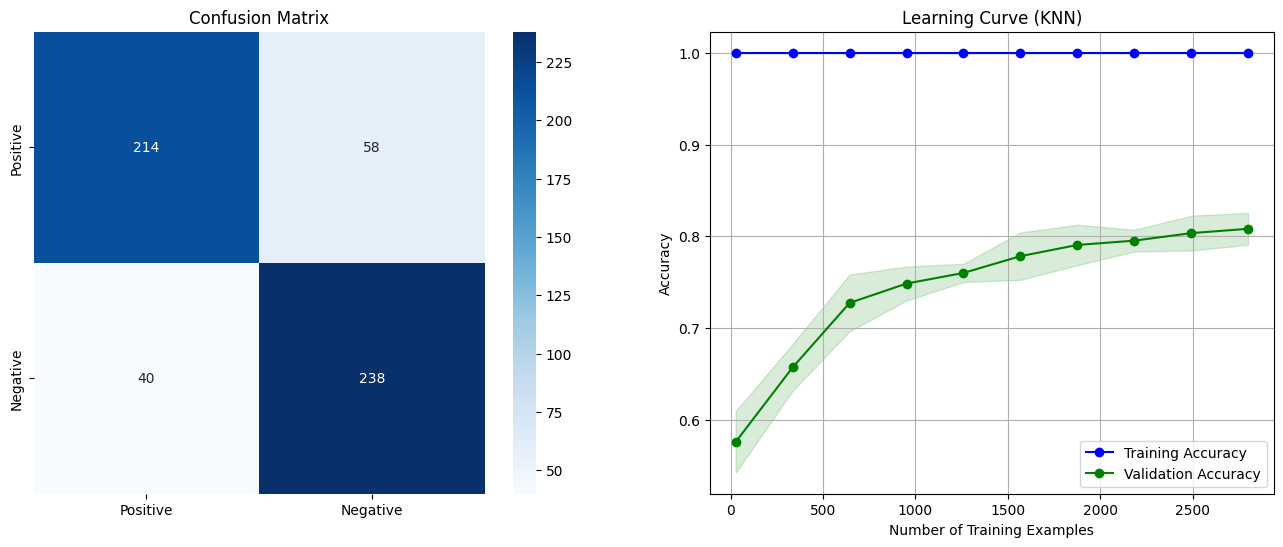

In [57]:
model_xgb = XGBClassifier(max_depth=gs_xgb.best_params_["max_depth"],
                          n_estimators=gs_xgb.best_params_["n_estimators"],
                          learning_rate=gs_xgb.best_params_["learning_rate"],
                          objective="binary:logistic",
                          eval_metric="auc",
                          random_state=42,
                          subsample=0.8)

model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_val)

print(f"Accuracy score: {accuracy_score(y_val,y_pred_xgb)}")
print(f"Precision score: {precision_score(y_val,y_pred_xgb)}")
print(f"Recall score: {recall_score(y_val,y_pred_xgb)}")
print(f"matt_score: {matthews_corrcoef(y_val,y_pred_xgb)}")
matrix_xgb = confusion_matrix(y_val,y_pred_xgb)

print(classification_report(y_val,y_pred_xgb))

train_sizes, train_scores, test_scores = learning_curve(model_xgb,X_train, y_train,
                                                        cv=10, scoring='f1_macro',
                                                        train_sizes=np.linspace(0.01, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))

sns.heatmap(matrix_xgb, annot=True, cmap='Blues', fmt='g', ax=ax1,
            xticklabels=["Positive","Negative"],
            yticklabels=["Positive","Negative"])
ax1.set_title("Confusion Matrix")

ax2.plot(train_sizes, train_mean, label='Training Accuracy', marker='o', color='blue')
ax2.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
ax2.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o', color='green')
ax2.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
ax2.set_title('Learning Curve (KNN)')
ax2.set_xlabel('Number of Training Examples')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='lower right')
ax2.grid(True)

plt.show()

## LOGISTIC REGRESSION

In [61]:
scaler = PowerTransformer()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#display(scaler.mean_)
#display(scaler.scale_)

In [62]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [63]:
y_pred = log_reg.predict(X_test)
y_pred[:20]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [64]:
y_prob = log_reg.predict_proba(X_test)
y_prob[:20]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [65]:
accuracy_lr = accuracy_score(y_test, y_pred)

In [66]:
report_lr = classification_report(y_test, y_pred)

In [67]:
Scores_lr = {'Accuracy':round(accuracy_score(y_test, y_pred),3),
          'F1_score':round(f1_score(y_test, y_pred),3),
          'Recall':round(recall_score(y_test, y_pred),3),
          'Precision':round(precision_score(y_test, y_pred),3)}
df_lr=pd.DataFrame(data=Scores_lr,index=['LogisticRegression'])
df_lr

Accuracy  F1_score  Recall  Precision
LogisticRegression     0.564     0.329   0.212      0.734

Accuracy LOG: 0.5641421947449768
Classification Report LOG:
               precision    recall  f1-score   support

           0       0.54      0.92      0.68       321
           1       0.73      0.21      0.33       326

    accuracy                           0.56       647
   macro avg       0.63      0.57      0.50       647
weighted avg       0.64      0.56      0.50       647

Confusion Matrix LOG:
 [[296  25]
 [257  69]]


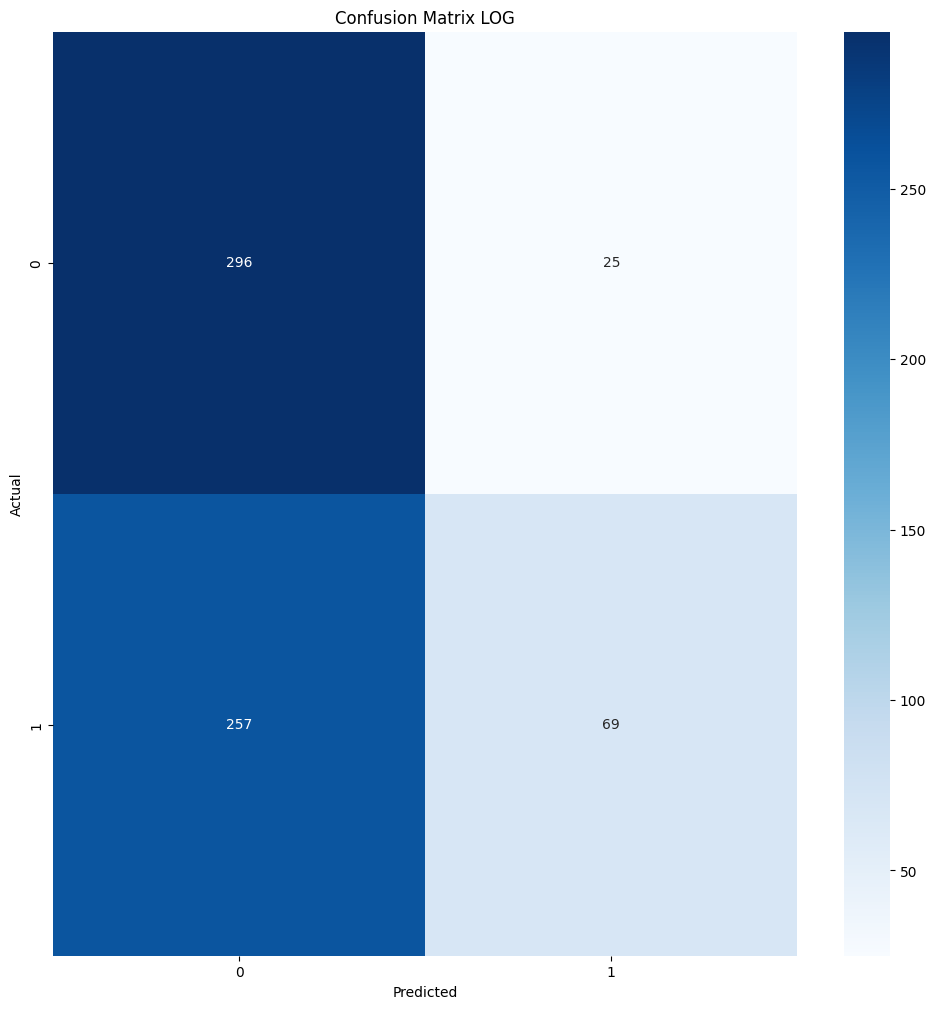

In [68]:
conf_matrix_lr = confusion_matrix(y_test, y_pred)

print(f'Accuracy LOG: {accuracy_lr}')
print('Classification Report LOG:\n', report_lr)
print('Confusion Matrix LOG:\n', conf_matrix_lr)

conf_matrix_lr = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix_lr, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix LOG')
plt.show()

## KNN



In [69]:
kn_classifier = KNeighborsClassifier()
kn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [70]:
y_kn_pred = kn_classifier.predict(X_test)

In [71]:
accuracy_kn = accuracy_score(y_test, y_kn_pred)

In [72]:
report_kn = classification_report(y_test, y_kn_pred)

In [73]:
Scores_kn = {'Accuracy':round(accuracy_score(y_test, y_kn_pred),3),
          'F1_score':round(f1_score(y_test, y_kn_pred),3),
          'Recall':round(recall_score(y_test, y_kn_pred),3),
          'Precision':round(precision_score(y_test, y_kn_pred),3)}
df_kn=pd.DataFrame(data=Scores_kn,index=['KNN'])
df_kn

Accuracy  F1_score  Recall  Precision
KNN     0.709     0.734   0.794      0.682

Accuracy KNN: 0.7094281298299846
Classification Report KNN:
               precision    recall  f1-score   support

           0       0.75      0.62      0.68       321
           1       0.68      0.79      0.73       326

    accuracy                           0.71       647
   macro avg       0.72      0.71      0.71       647
weighted avg       0.72      0.71      0.71       647

Confusion Matrix KNN:
 [[200 121]
 [ 67 259]]


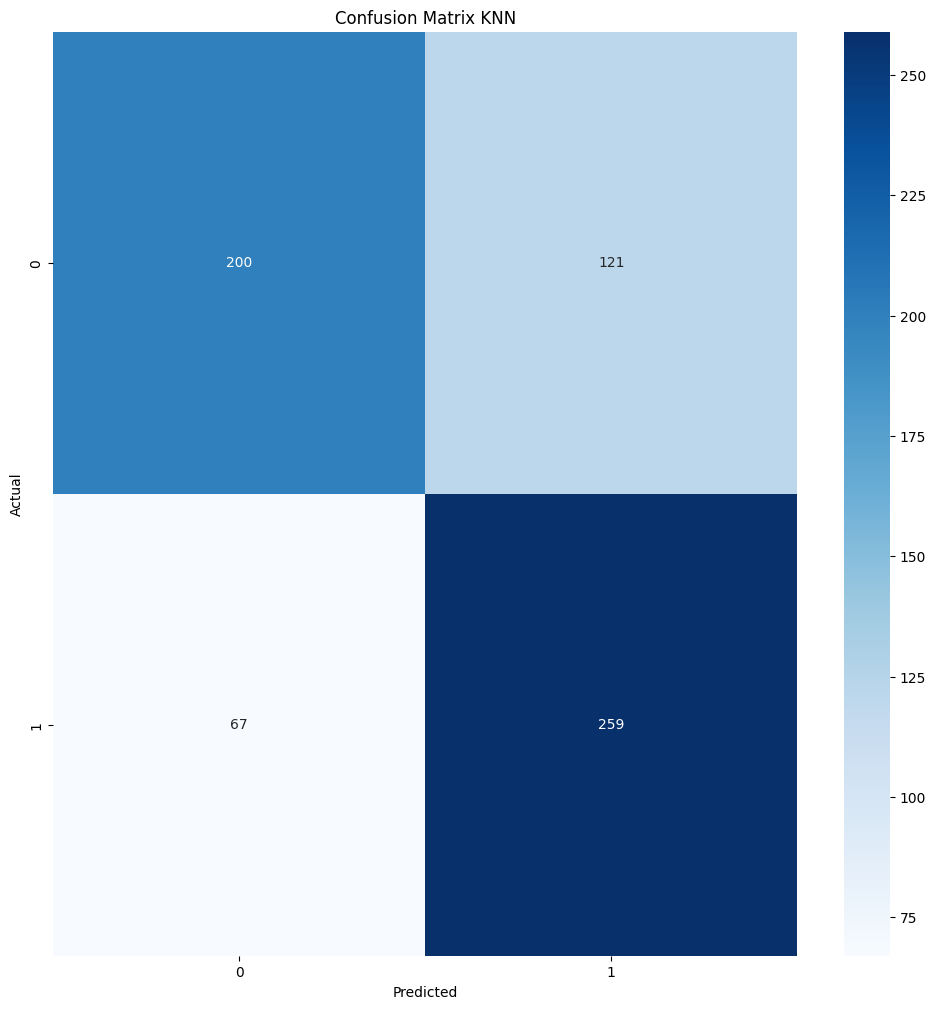

In [74]:
conf_matrix_kn = confusion_matrix(y_test, y_kn_pred)

print(f'Accuracy KNN: {accuracy_kn}')
print('Classification Report KNN:\n', report_kn)
print('Confusion Matrix KNN:\n', conf_matrix_kn)

sns.heatmap(conf_matrix_kn, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix KNN')
plt.show()

In [75]:
#krzywa walidacji krzyżowej i KNN

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=3)

scores = cross_val_score(knn_classifier, X_train, y_train, cv = 15)
scores

array([0.65384615, 0.69711538, 0.71634615, 0.67307692, 0.69230769,
       0.71634615, 0.70673077, 0.66183575, 0.69082126, 0.66183575,
       0.68599034, 0.76811594, 0.69082126, 0.70048309, 0.7294686 ])

In [77]:
print(f'Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})')

Accuracy: 0.6963 (+/- 0.0284)


In [78]:
scores_df = pd.DataFrame({'Accuracy': scores})

In [79]:
fig = px.bar(scores_df, y='Accuracy', color='Accuracy', width=700, height=400,
       title=f'Walidacja krzyżowa (15 podziałów) | Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})',
       color_continuous_scale=px.colors.sequential.Inferno_r, range_color=[scores.min() - 0.01, 1.0])

fig.show()

## Drzewo decyzyjne

In [81]:
d_tree = DecisionTreeClassifier(random_state=42, max_depth=3,criterion='gini').fit(X_train, y_train)

[Text(0.5, 0.875, 'x[7] <= 26342.5\ngini = 0.5\nsamples = 3112\nvalue = [1542, 1570]'),
 Text(0.25, 0.625, 'x[9] <= 520318.5\ngini = 0.493\nsamples = 2530\nvalue = [1112, 1418]'),
 Text(0.125, 0.375, 'x[9] <= 271975.0\ngini = 0.499\nsamples = 2293\nvalue = [1090, 1203]'),
 Text(0.0625, 0.125, 'gini = 0.493\nsamples = 2142\nvalue = [948, 1194]'),
 Text(0.1875, 0.125, 'gini = 0.112\nsamples = 151\nvalue = [142, 9]'),
 Text(0.375, 0.375, 'x[1] <= 95.0\ngini = 0.168\nsamples = 237\nvalue = [22, 215]'),
 Text(0.3125, 0.125, 'gini = 0.143\nsamples = 233\nvalue = [18, 215]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.75, 0.625, 'x[9] <= 95435.5\ngini = 0.386\nsamples = 582\nvalue = [430, 152]'),
 Text(0.625, 0.375, 'x[2] <= 46646.5\ngini = 0.497\nsamples = 205\nvalue = [110, 95]'),
 Text(0.5625, 0.125, 'gini = 0.083\nsamples = 23\nvalue = [1, 22]'),
 Text(0.6875, 0.125, 'gini = 0.48\nsamples = 182\nvalue = [109, 73]'),
 Text(0.875, 0.375, 'x[6] <= 26199.0\ngini 

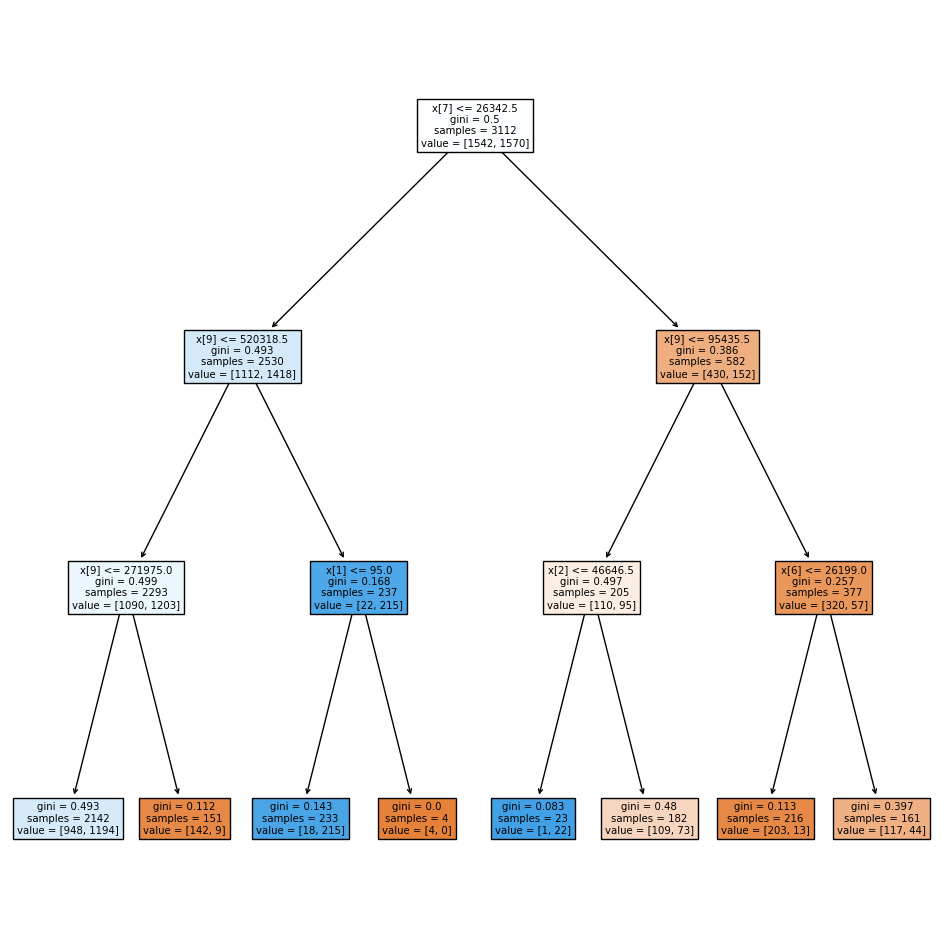

In [82]:
plot_tree(d_tree,filled=True)

In [83]:
d_tree.feature_importances_

array([0.        , 0.0247006 , 0.04646947, 0.        , 0.        ,
       0.        , 0.03090349, 0.31268674, 0.        , 0.58523969])

In [84]:
y_pred_tree = d_tree.predict(X_test)

In [85]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)

In [86]:
report_tree = classification_report(y_test, y_pred_tree)

In [87]:
Scores_tree = {'Accuracy':round(accuracy_score(y_test, y_pred_tree),3),
          'F1_score':round(f1_score(y_test, y_pred_tree),3),
          'Recall':round(recall_score(y_test, y_pred_tree),3),
          'Precision':round(precision_score(y_test, y_pred_tree),3)}
df_tree=pd.DataFrame(data=Scores_tree,index=['DecisionTree'])
df_tree

Accuracy  F1_score  Recall  Precision
DecisionTree     0.645     0.727   0.939      0.593

Accuracy TREE: 0.6445131375579598
Classification Report TREE:
               precision    recall  f1-score   support

           0       0.85      0.35      0.49       321
           1       0.59      0.94      0.73       326

    accuracy                           0.64       647
   macro avg       0.72      0.64      0.61       647
weighted avg       0.72      0.64      0.61       647

Confusion Matrix TREE:
 [[111 210]
 [ 20 306]]


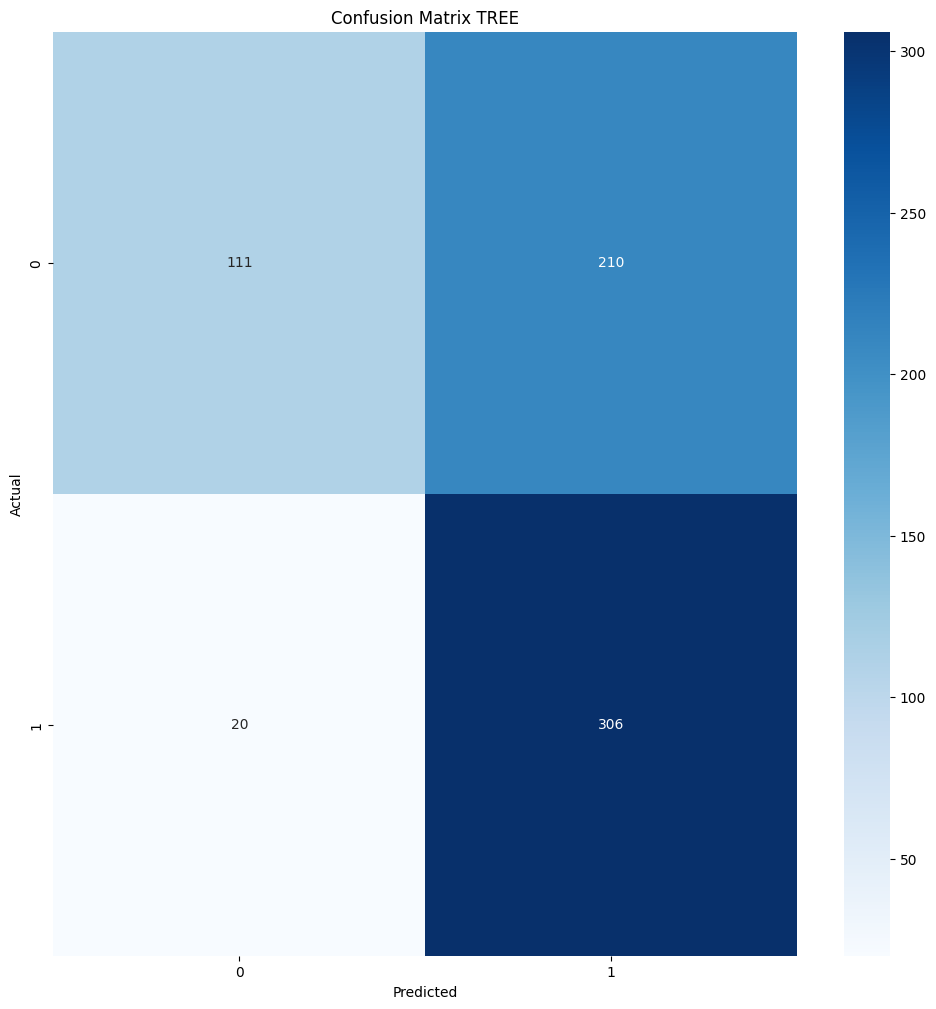

In [88]:
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

print(f'Accuracy TREE: {accuracy_tree}')
print('Classification Report TREE:\n', report_tree)
print('Confusion Matrix TREE:\n', conf_matrix_tree)

sns.heatmap(conf_matrix_tree, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix TREE')
plt.show()

## RANDOM FOREST

In [89]:
param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [3, 9, 15],
              'min_samples_leaf':[5, 15, 45],
              'min_samples_split': [5, 15, 45],
              'criterion': ['entropy']}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=10)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [3, 9, 15],
                         'min_samples_leaf': [5, 15, 45],
                         'min_samples_split': [5, 15, 45],
                         'n_estimators': [50, 100, 150]})

In [90]:
print(grid.best_params_)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}


In [91]:
rf_classifier = RandomForestClassifier(n_estimators=100,min_samples_split=5,min_samples_leaf=5,
                                       max_depth=15,criterion="gini")

rf_classifier = rf_classifier.fit(X_train, y_train)

y_rf_pred = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_rf_pred)

report_rf = classification_report(y_test, y_rf_pred)

Scores_rf = {'Accuracy':round(accuracy_score(y_test, y_rf_pred),3),
          'F1_score':round(f1_score(y_test, y_rf_pred),3),
          'Recall':round(recall_score(y_test, y_rf_pred),3),
          'Precision':round(precision_score(y_test, y_rf_pred),3)}
df_rf=pd.DataFrame(data=Scores_rf,index=['RandomForest'])
df_rf

Accuracy  F1_score  Recall  Precision
RandomForest     0.777      0.79   0.831      0.753

Accuracy RF: 0.7774343122102009
Classification Report RF:
               precision    recall  f1-score   support

           0       0.81      0.72      0.76       321
           1       0.75      0.83      0.79       326

    accuracy                           0.78       647
   macro avg       0.78      0.78      0.78       647
weighted avg       0.78      0.78      0.78       647

Confusion Matrix RF:
 [[232  89]
 [ 55 271]]


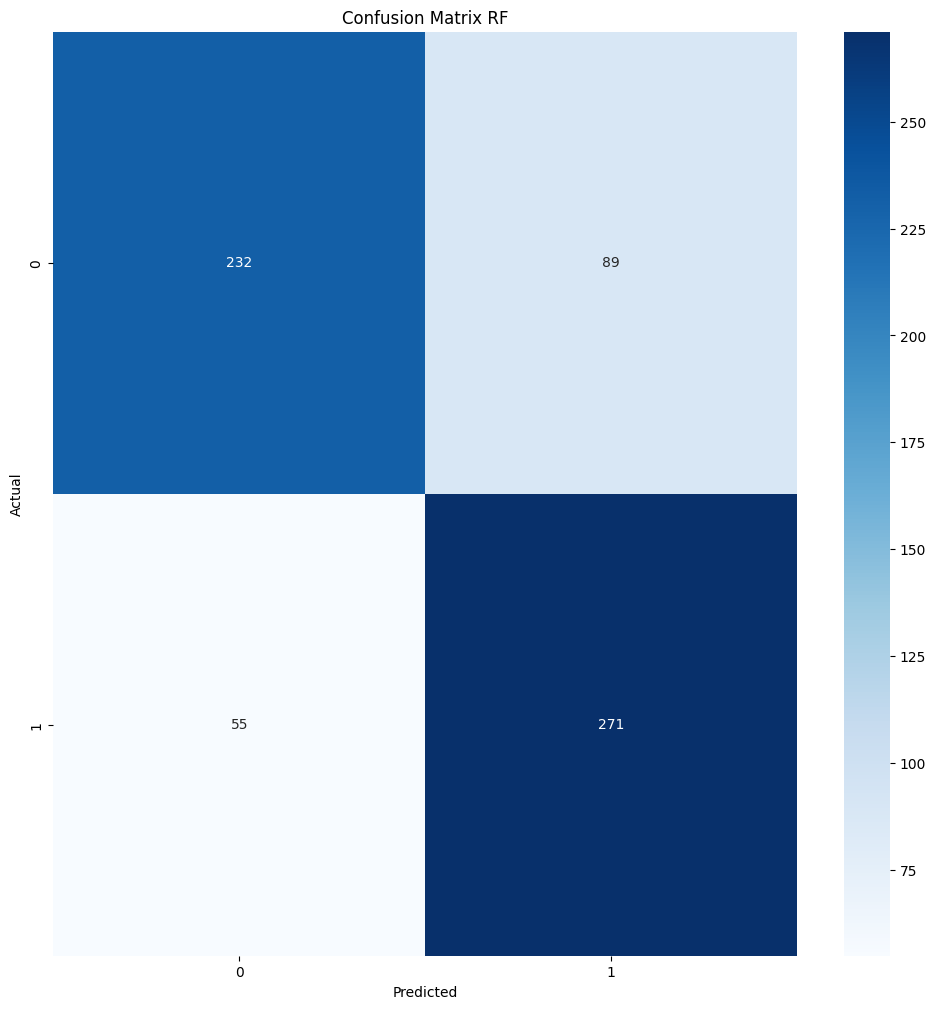

In [92]:
conf_matrix_rf = confusion_matrix(y_test, y_rf_pred)

print(f'Accuracy RF: {accuracy_rf}')
print('Classification Report RF:\n', report_rf)
print('Confusion Matrix RF:\n', conf_matrix_rf)

sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix RF')
plt.show()

## ROC

0.9926743331102795
0.8623836553714428


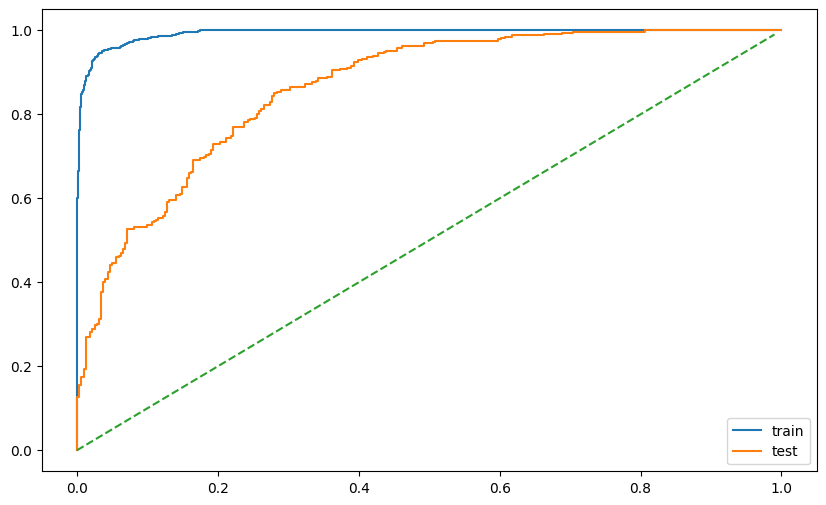

In [97]:
pred_train_proba = rf_classifier.predict_proba(X_train)[:,1]
pred_test_proba = rf_classifier.predict_proba(X_test)[:,1]

print(roc_auc_score(y_train,pred_train_proba))
print(roc_auc_score(y_test,pred_test_proba))

fpr_train, tpr_train, thresholds =roc_curve(y_train, pred_train_proba)
fpr_test, tpr_test, thresholds_test =roc_curve(y_test, pred_test_proba)

plt.rcParams["figure.figsize"] = (10,6)
plt.plot(fpr_train,tpr_train, label='train')
plt.plot(fpr_test,tpr_test,label='test')
plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01),'--')
plt.legend()
plt.show()

In [98]:
#leaf
tree_train_scores, rf_train_scores, tree_test_scores, rf_test_scores = [], [], [], []

for i in range(2,50,1):
    tree_1_classifier = DecisionTreeClassifier(max_leaf_nodes=i).fit(X_train,y_train)
    tree_train_scores.append(tree_1_classifier.score(X_train,y_train))
    tree_test_scores.append(tree_1_classifier.score(X_test,y_test))

    rf_1_classifier = RandomForestClassifier(max_leaf_nodes=i, n_estimators=50).fit(X_train,y_train)
    rf_train_scores.append(rf_1_classifier.score(X_train,y_train))
    rf_test_scores.append(rf_1_classifier.score(X_test,y_test))

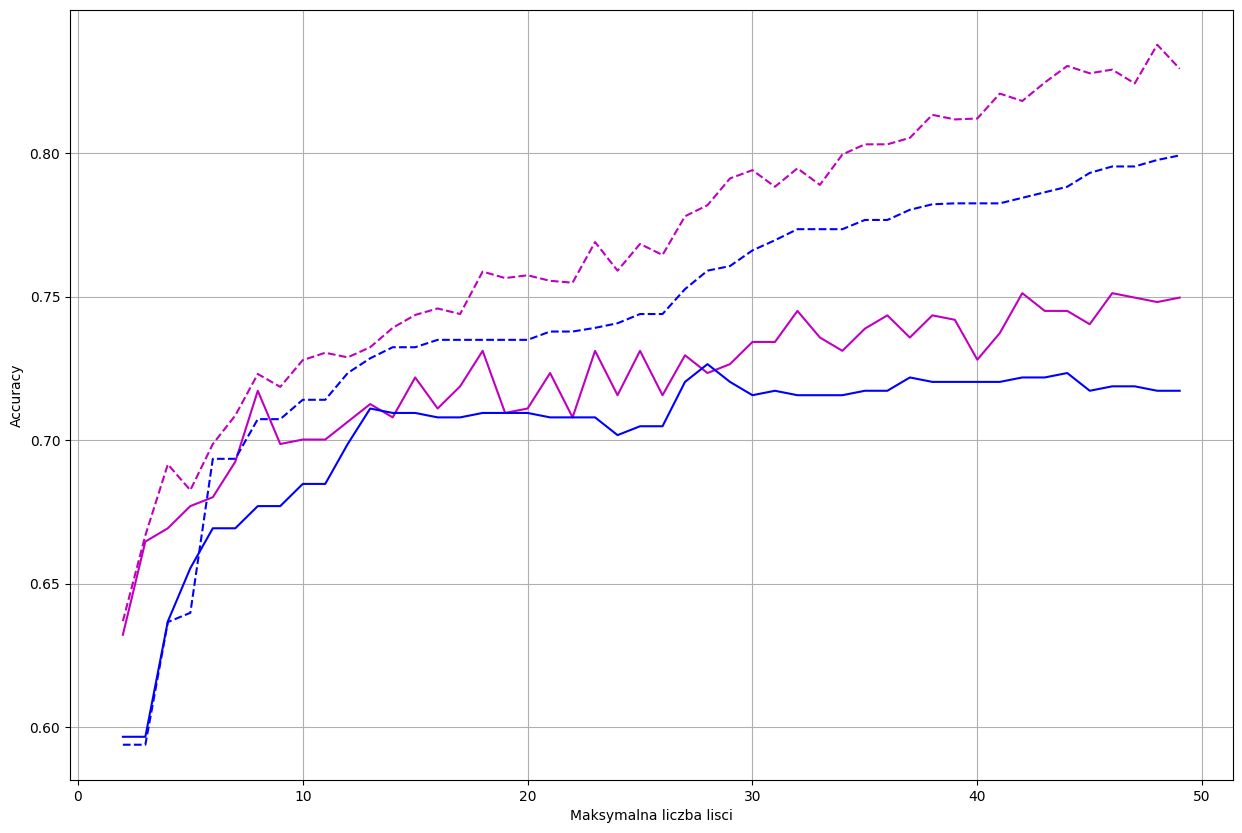

In [99]:
plt.figure(figsize=(15,10))
plt.xlabel('Maksymalna liczba lisci')
plt.ylabel('Accuracy')

plt.plot(range(2,50,1), rf_train_scores,'m--')
plt.plot(range(2,50,1), rf_test_scores, 'm')
plt.plot(range(2,50,1), tree_train_scores, 'b--')
plt.plot(range(2,50,1), tree_test_scores, 'b')
plt.grid()
plt.show()

In [100]:
#max_deph

tree_train_scores, rf_train_scores, tree_test_scores, rf_test_scores = [], [], [], []

for i in range(2,15,1):
    tree_1_classifier = DecisionTreeClassifier(max_depth=i).fit(X_train,y_train)
    tree_train_scores.append(tree_1_classifier.score(X_train,y_train))
    tree_test_scores.append(tree_1_classifier.score(X_test,y_test))

    rf_1_classifier = RandomForestClassifier(max_depth=i, n_estimators=50).fit(X_train,y_train)
    rf_train_scores.append(rf_1_classifier.score(X_train,y_train))
    rf_test_scores.append(rf_1_classifier.score(X_test,y_test))

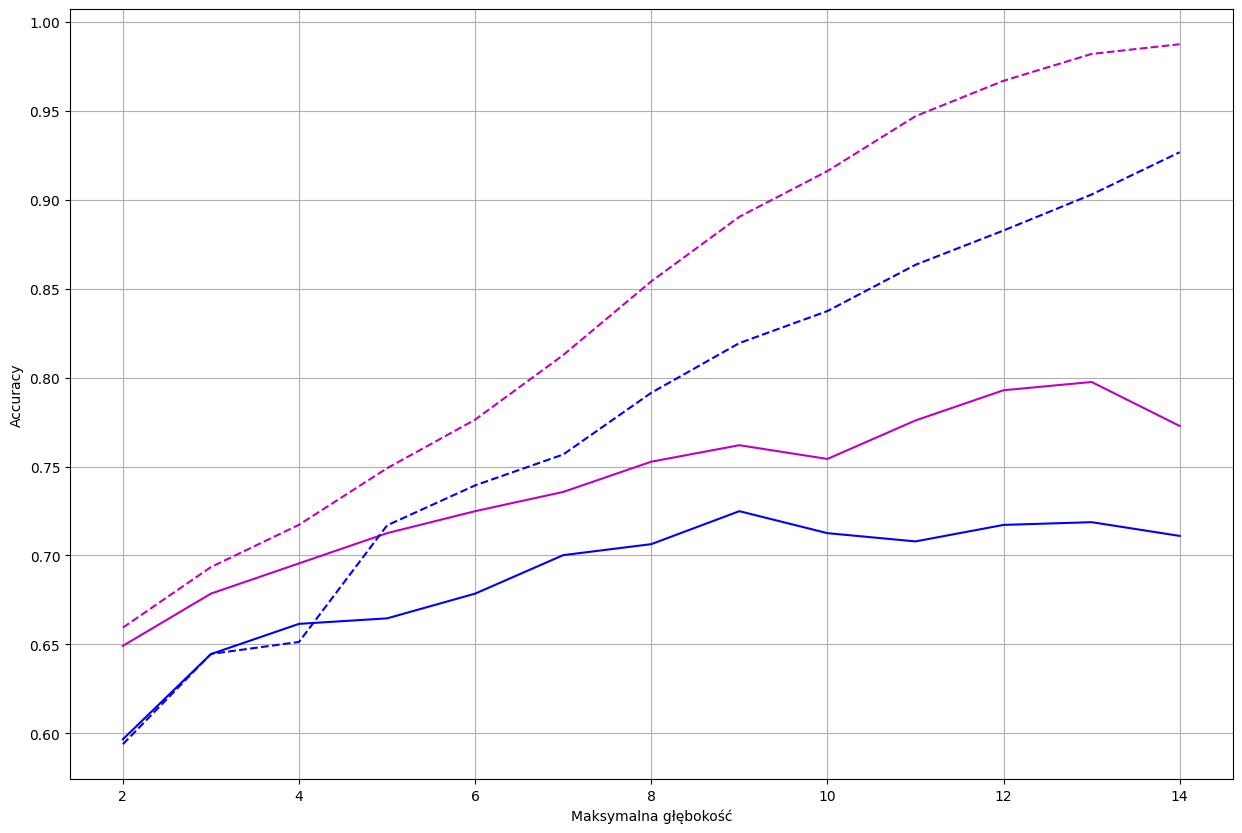

In [101]:
plt.figure(figsize=(15,10))
plt.xlabel('Maksymalna głębokość')
plt.ylabel('Accuracy')

plt.plot(range(2,15,1), rf_train_scores,'m--')
plt.plot(range(2,15,1), rf_test_scores, 'm')
plt.plot(range(2,15,1), tree_train_scores, 'b--')
plt.plot(range(2,15,1), tree_test_scores, 'b')
plt.grid()
plt.show()

In [102]:
model = RandomForestClassifier()

param_grid = {
    'max_depth': [5, 10, 15, 20, 30, 40],
    'min_samples_leaf': [1, 2, 4, 6],
    'min_samples_split': [2, 4, 6]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print('Najlepsze parametry: ', best_params)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Najlepsze parametry:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [103]:
brf_classifier = grid_search.best_estimator_

In [104]:
brf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=30)

In [105]:
y_brf_pred = brf_classifier.predict(X_test)

In [106]:
accuracy_brf = accuracy_score(y_test, y_brf_pred)

In [107]:
report_brf = classification_report(y_test, y_brf_pred)

Accuracy BRF: 0.7774343122102009
Classification Report BRF:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80       321
           1       0.79      0.83      0.81       326

    accuracy                           0.80       647
   macro avg       0.80      0.80      0.80       647
weighted avg       0.80      0.80      0.80       647

Confusion Matrix BRF:
 [[251  70]
 [ 57 269]]


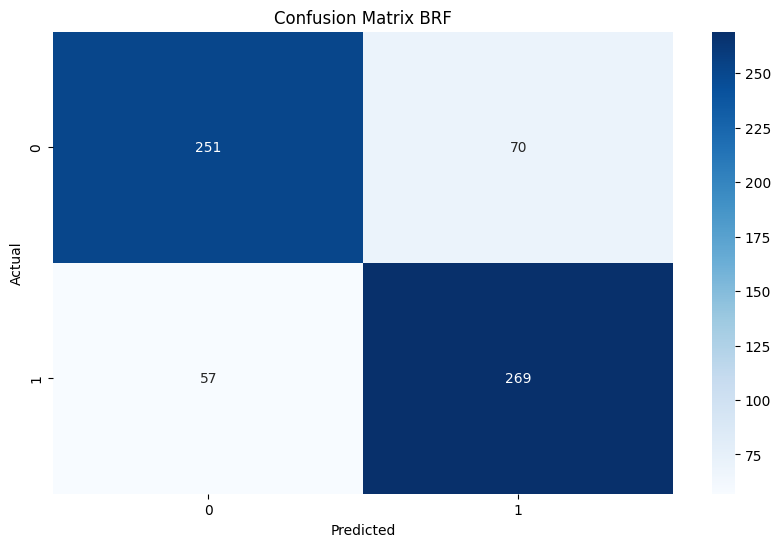

In [108]:
conf_matrix_brf = confusion_matrix(y_test, y_brf_pred)

print(f'Accuracy BRF: {accuracy_rf}')
print('Classification Report BRF:\n', report_brf)
print('Confusion Matrix BRF:\n', conf_matrix_brf)

sns.heatmap(conf_matrix_brf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix BRF')
plt.show()

## EXTRA TREES CLASSIFIER

In [109]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

ext_clf = ExtraTreesClassifier()

grid_search = GridSearchCV(estimator=ext_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [110]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [111]:
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'bootstrap': False, 'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [112]:
best_ext_clf = grid_search.best_estimator_
ext_clf_pred = best_ext_clf.predict(X_val)

In [113]:
ext_clf_pred = best_ext_clf.predict(X_val)

In [114]:
accuracy_ext_clf = accuracy_score(y_val, ext_clf_pred)

In [115]:
report_ext_clf = classification_report(y_val, ext_clf_pred)

Accuracy ETC: 0.8072727272727273
Classification Report ETC:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       272
           1       0.79      0.84      0.81       278

    accuracy                           0.81       550
   macro avg       0.81      0.81      0.81       550
weighted avg       0.81      0.81      0.81       550

Confusion Matrix ETC:
 [[211  61]
 [ 45 233]]


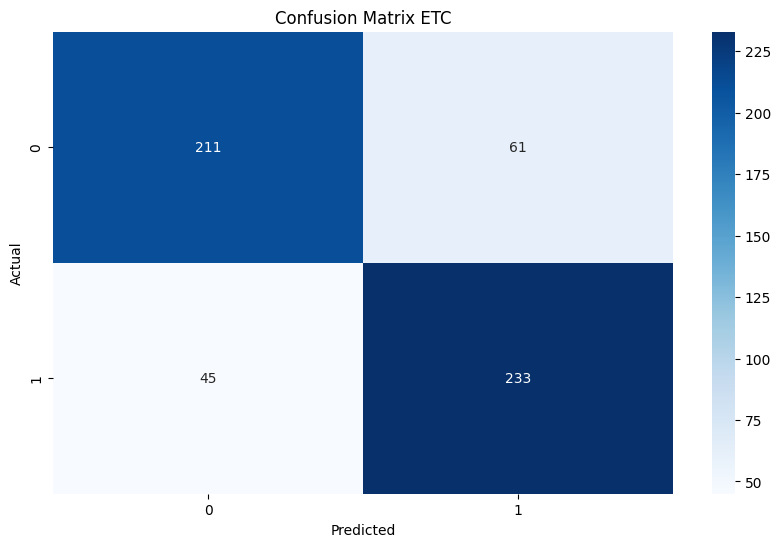

In [116]:
conf_matrix_ext_clf = confusion_matrix(y_val, ext_clf_pred)

print(f'Accuracy ETC: {accuracy_ext_clf}')
print('Classification Report ETC:\n', report_ext_clf)
print('Confusion Matrix ETC:\n', conf_matrix_ext_clf)

sns.heatmap(conf_matrix_ext_clf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix ETC')
plt.show()

In [117]:
Scores_etc = {'Accuracy':round(accuracy_score(y_val, ext_clf_pred),3),
          'F1_score':round(f1_score(y_val, ext_clf_pred),3),
          'Recall':round(recall_score(y_val, ext_clf_pred),3),
          'Precision':round(precision_score(y_val, ext_clf_pred),3)}
df_etc=pd.DataFrame(data=Scores_etc,index=['ETC'])
df_etc

Accuracy  F1_score  Recall  Precision
ETC     0.807     0.815   0.838      0.793

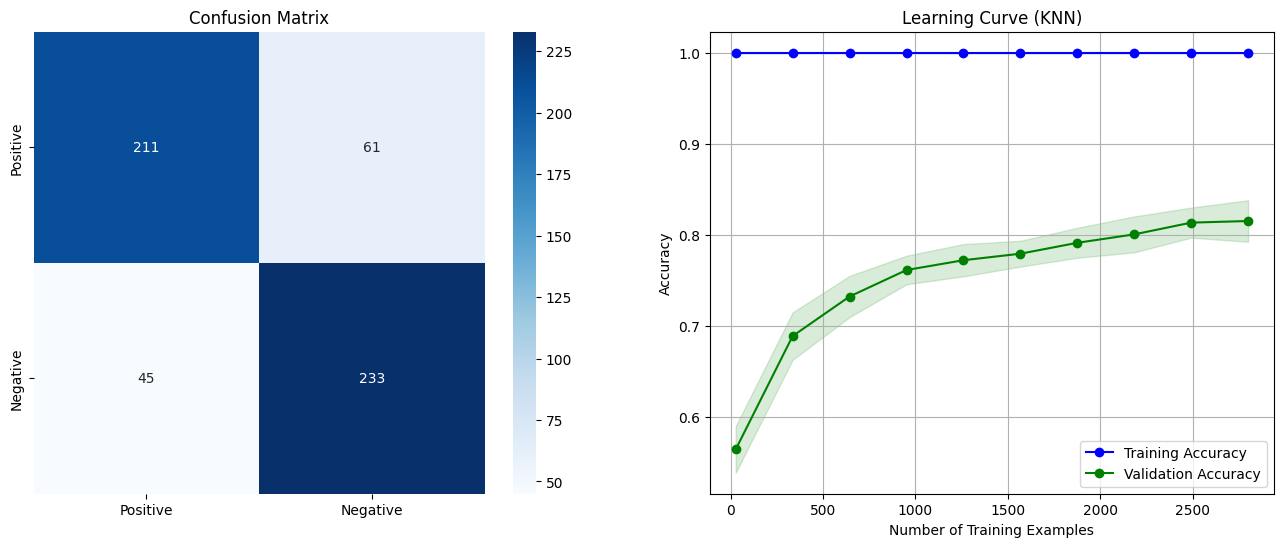

In [118]:
train_sizes, train_scores, test_scores = learning_curve(best_ext_clf,X_train, y_train,
                                                        cv=10, scoring='f1_macro',
                                                        train_sizes=np.linspace(0.01, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))

sns.heatmap(conf_matrix_ext_clf, annot=True, cmap='Blues', fmt='g', ax=ax1,
            xticklabels=["Positive","Negative"],
            yticklabels=["Positive","Negative"])
ax1.set_title("Confusion Matrix")

ax2.plot(train_sizes, train_mean, label='Training Accuracy', marker='o', color='blue')
ax2.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
ax2.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o', color='green')
ax2.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
ax2.set_title('Learning Curve (KNN)')
ax2.set_xlabel('Number of Training Examples')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='lower right')
ax2.grid(True)

plt.show()

In [119]:
import lightgbm as lgb

params = {
    'objective': 'multiclass',
    'num_class': len(y_train.unique()),
    'boosting_type': 'gbdt',
    'metric': 'multi_logloss',
    'sub_feature': 0.5,
    'num_leaves': 31,
    'min_data': 50,
    'max_depth': -1
}

d_train = lgb.Dataset(X_train, label = y_train)

In [120]:
lgb = lgb.train(params, d_train, 100)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2204
[LightGBM] [Info] Number of data points in the train set: 3112, number of used features: 10
[LightGBM] [Info] Start training from score -0.702185
[LightGBM] [Info] Start training from score -0.684190


In [121]:
lgb_pred = lgb.predict(X_val)

In [122]:
lgb_pred_max = [max(enumerate(val), key=lambda x: x[1])[0] for val in lgb_pred]

In [123]:
accuracy_lgb = accuracy_score(y_val, lgb_pred_max)

In [124]:
report_lgb = classification_report(y_val, lgb_pred_max)

Accuracy LGB: 0.7945454545454546
Classification Report LGB:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78       272
           1       0.77      0.84      0.80       278

    accuracy                           0.79       550
   macro avg       0.80      0.79      0.79       550
weighted avg       0.80      0.79      0.79       550

Confusion Matrix LGB:
 [[204  68]
 [ 45 233]]


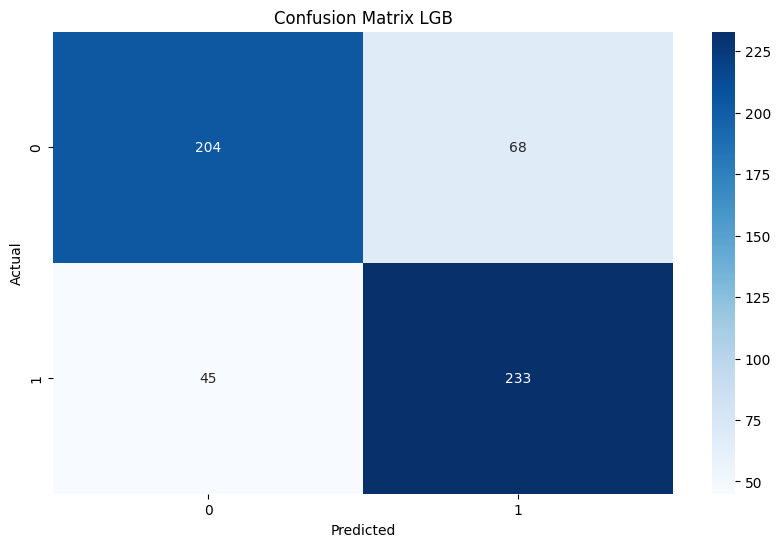

In [125]:
conf_matrix_lgb = confusion_matrix(y_val, lgb_pred_max)

print(f'Accuracy LGB: {accuracy_lgb}')
print('Classification Report LGB:\n', report_lgb)
print('Confusion Matrix LGB:\n', conf_matrix_lgb)

sns.heatmap(conf_matrix_lgb, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix LGB')
plt.show()

In [126]:
Scores_lgb = {'Accuracy':round(accuracy_score(y_val, lgb_pred_max),3),
          'F1_score':round(f1_score(y_val, lgb_pred_max),3),
          'Recall':round(recall_score(y_val, lgb_pred_max),3),
          'Precision':round(precision_score(y_val, lgb_pred_max),3)}
df_lgb=pd.DataFrame(data=Scores_etc,index=['LGB'])
df_lgb

Accuracy  F1_score  Recall  Precision
LGB     0.807     0.815   0.838      0.793

## ADA BOOST

In [127]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

tree = RandomForestClassifier(max_depth = 10)
clf = AdaBoostClassifier(tree)
params = {
    'n_estimators' : [2,5,10,15,20],
    'learning_rate' : [0.01,0.1,1,10]
}
random_search = RandomizedSearchCV(clf, params, n_iter = 10, cv = 5)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=10)),
                   param_distributions={'learning_rate': [0.01, 0.1, 1, 10],
                                        'n_estimators': [2, 5, 10, 15, 20]})

In [128]:
random_search.best_params_

{'n_estimators': 10, 'learning_rate': 1}

In [129]:
ada_classifier = AdaBoostClassifier(n_estimators = 15, learning_rate = 1)

In [130]:
ada_classifier.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=15)

In [131]:
y_ada_pred = ada_classifier.predict(X_test)

In [132]:
accuracy_ada = accuracy_score(y_test, y_ada_pred)

In [133]:
report_ada = classification_report(y_test, y_ada_pred)

Accuracy ADA: 0.6831530139103554
Classification Report ADA:
               precision    recall  f1-score   support

           0       0.68      0.69      0.68       321
           1       0.69      0.68      0.68       326

    accuracy                           0.68       647
   macro avg       0.68      0.68      0.68       647
weighted avg       0.68      0.68      0.68       647

Confusion Matrix ADA:
 [[221 100]
 [105 221]]


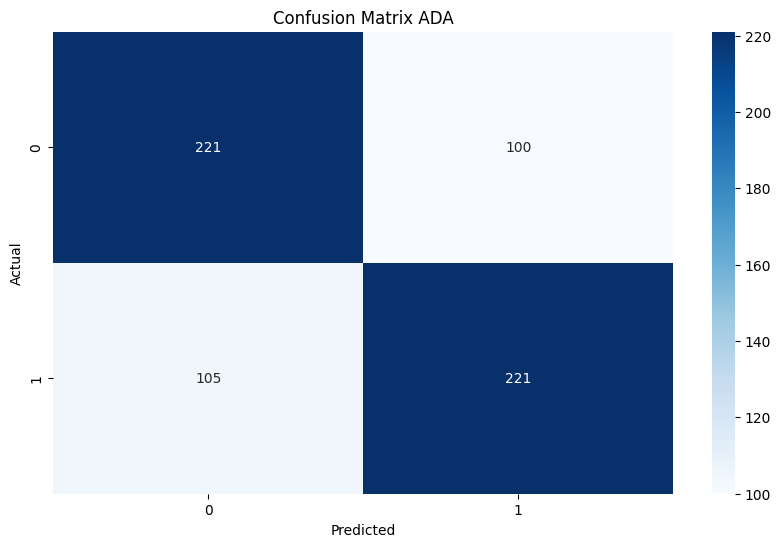

In [134]:
conf_matrix_ada = confusion_matrix(y_test, y_ada_pred)

print(f'Accuracy ADA: {accuracy_ada}')
print('Classification Report ADA:\n', report_ada)
print('Confusion Matrix ADA:\n', conf_matrix_ada)

sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix ADA')
plt.show()

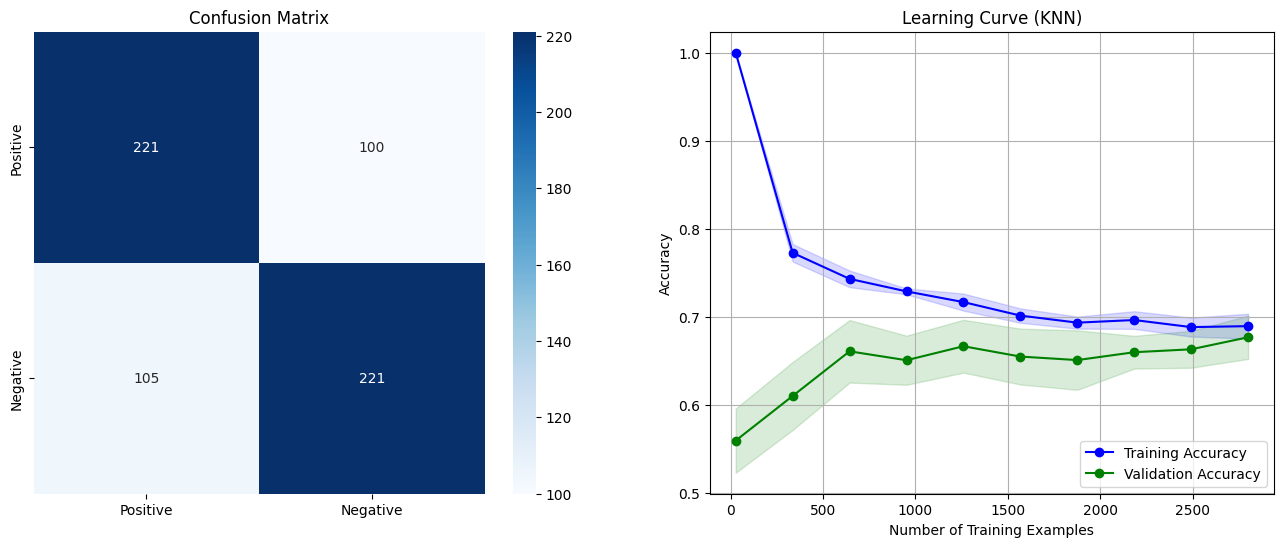

In [135]:
train_sizes, train_scores, test_scores = learning_curve(ada_classifier,X_train, y_train,
                                                        cv=10, scoring='f1_macro',
                                                        train_sizes=np.linspace(0.01, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))

sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', fmt='g', ax=ax1,
            xticklabels=["Positive","Negative"],
            yticklabels=["Positive","Negative"])
ax1.set_title("Confusion Matrix")

ax2.plot(train_sizes, train_mean, label='Training Accuracy', marker='o', color='blue')
ax2.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
ax2.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o', color='green')
ax2.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
ax2.set_title('Learning Curve (KNN)')
ax2.set_xlabel('Number of Training Examples')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='lower right')
ax2.grid(True)

plt.show()

## SVM

In [136]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [137]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [138]:
from sklearn.svm import SVC

svm_classifier = SVC(C=1.0, kernel='rbf')

svm_classifier.fit(X_train, y_train)

SVC()

In [139]:
y_svm_pred = svm_classifier.predict(X_val)

In [140]:
svm_classifier.score(X_val, y_val)

0.7

In [141]:
accuracy_svm = accuracy_score(y_val, y_svm_pred)

In [142]:
report_svm = classification_report(y_val, y_svm_pred)

In [143]:
Scores_svm = {'Accuracy':round(accuracy_score(y_val, y_svm_pred),3),
          'F1_score':round(f1_score(y_val, y_svm_pred),3),
          'Recall':round(recall_score(y_val, y_svm_pred),3),
          'Precision':round(precision_score(y_val, y_svm_pred),3)}
df_svm=pd.DataFrame(data=Scores_svm,index=['SVM'])
df_svm

Accuracy  F1_score  Recall  Precision
SVM       0.7     0.729   0.799      0.671

In [144]:
conf_matrix_svm = confusion_matrix(y_val, y_svm_pred)

print(f'Accuracy SVM: {accuracy_svm}')
print('Classification Report SVM:\n', report_svm)
print('Confusion Matrix SVM:\n', conf_matrix_svm)

sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVM')
plt.show()
df_rf=pd.DataFrame(data=Scores_svm,index=['SVM'])
df_rf

Accuracy SVM: 0.7
Classification Report SVM:
               precision    recall  f1-score   support

           0       0.74      0.60      0.66       272
           1       0.67      0.80      0.73       278

    accuracy                           0.70       550
   macro avg       0.71      0.70      0.70       550
weighted avg       0.71      0.70      0.70       550

Confusion Matrix SVM:
 [[163 109]
 [ 56 222]]


Accuracy  F1_score  Recall  Precision
SVM       0.7     0.729   0.799      0.671

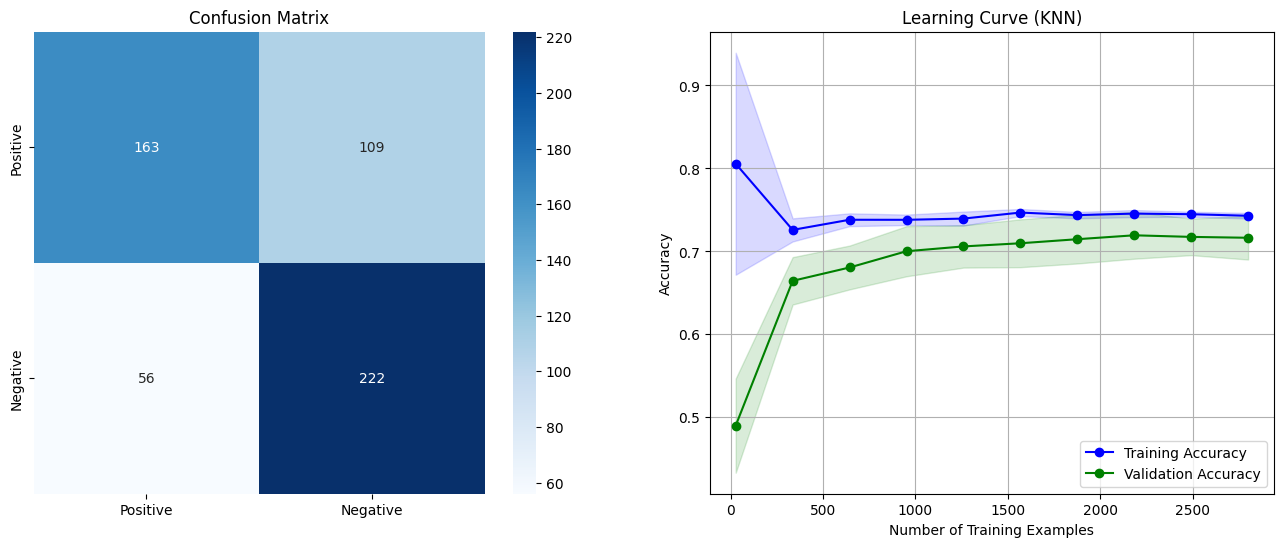

In [145]:
train_sizes, train_scores, test_scores = learning_curve(svm_classifier,X_train, y_train,
                                                        cv=10, scoring='f1_macro',
                                                        train_sizes=np.linspace(0.01, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))

sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='g', ax=ax1,
            xticklabels=["Positive","Negative"],
            yticklabels=["Positive","Negative"])
ax1.set_title("Confusion Matrix")

ax2.plot(train_sizes, train_mean, label='Training Accuracy', marker='o', color='blue')
ax2.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
ax2.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o', color='green')
ax2.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
ax2.set_title('Learning Curve (KNN)')
ax2.set_xlabel('Number of Training Examples')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='lower right')
ax2.grid(True)

plt.show()

## GRID SEACH

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {'C': [0.1, 1, 10, 100],
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'gamma':['scale', 'auto'],
#               'kernel': ['linear', 'rbf']}

# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1)

In [ ]:
# grid.fit(X_train, y_train)

In [ ]:
# grid.best_params_

In [ ]:
# svm_1_classifier = SVC(C=100, gamma='scale', kernel='rbf')

In [ ]:
# svm_1_classifier.fit(X_train, y_train)

In [ ]:
# y_svm_1_pred = svm_1_classifier.predict(X_test)

In [ ]:
# accuracy_svm_1 = accuracy_score(y_test, y_svm_1_pred)

In [ ]:
# report_svm_1 = classification_report(y_test, y_svm_1_pred)

In [ ]:
# conf_matrix_svm_1 = confusion_matrix(y_test, y_svm_1_pred)

# print(f'Accuracy SVM: {accuracy_ada}')
# print('Classification Report SVM:\n', report_ada)
# print('Confusion Matrix SVM:\n', conf_matrix_ada)

# sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', fmt='g')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix SVM')
# plt.show()

## Podsumowanie

In [ ]:
# result = pd.concat([df_lr,df_kn, df_tree, df_rf, df_svm])
# result

In [ ]:
# print("Projekt końcowy")